### Resources
1. [Seaborn Tutorial on Building Structured Multi-Plot Grids](https://seaborn.pydata.org/tutorial/axis_grids.html)
2. [Seaborn function documentation on JointGrid](https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid)
3. [Seaborn function documentation on PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid)

### Import statements

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting the default seaborn theme
sns.set_theme(style="darkgrid")

### Load example dataset

In [4]:
penguins = sns.load_dataset("penguins")
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Draw a plot of two variables with bivariate and univariate graphs: The `jointplot()` function

> The `seaborn.jointplot(data=None, *, x=None, y=None, hue=None, kind={“scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, color=None, palette=None, hue_order=None, hue_norm=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, **kwargs)` function provides a convenient interface to the JointGrid class, with several canned plot kinds. If you need more flexibility, you should use JointGrid directly.
>> See the documentation at, https://seaborn.pydata.org/generated/seaborn.jointplot.html

- In the simplest invocation with only x and y, creates a scatterplot on the joint axes and a histogram on the marginal axes.

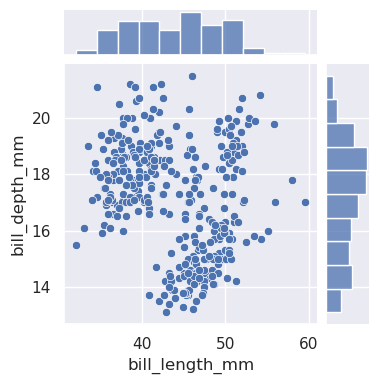

In [8]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", height=4)

- If `hue` is defined along with only x and y, creates a scatterplot on the joint axes and separate kde plots on the marginal axes.

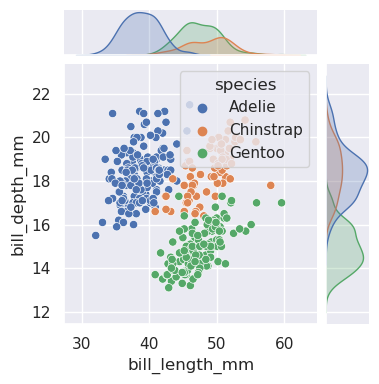

In [9]:
sns.jointplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", height=4
)

- `kind = "hist" | "kde"` will create both bivariate and univariate Histograms/KDEs on both the joint and marginal axes.

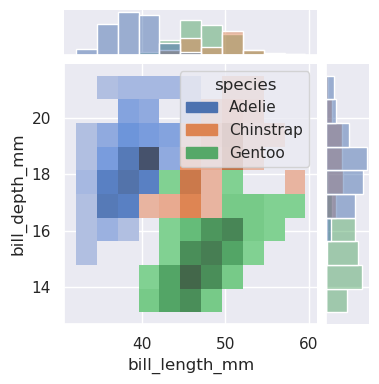

In [11]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    kind="hist",
    height=4,
)

- `kind="reg"` will add a linear regression fit to the scatterplot on the joint axes and univariate KDE curves on the marginal axes.

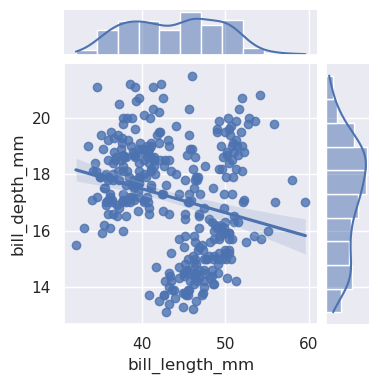

In [30]:
# currently hue is not supported with kind="reg"
sns.jointplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="reg", order=1, height=4
)

- Use the JointGrid method `.plot_joint(sns_plotting_func)` to overlay additional plots on the joint axes.

- Additional keyword arguments can be passed down to the underlying plots using the `joint_kws` and `marginal_kws` parameters.

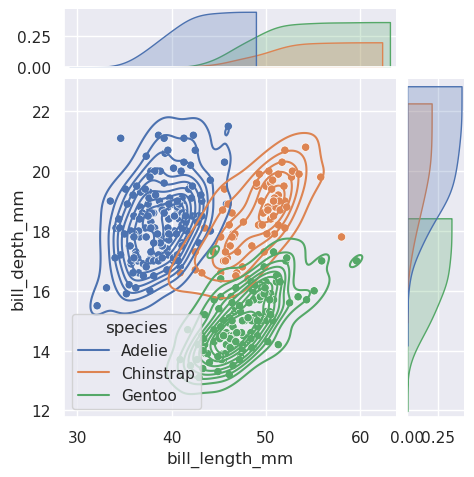

In [34]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    height=5,
    marker="o",
    marginal_kws=dict(cumulative=True),
    marginal_ticks=True,
).plot_joint(sns.kdeplot)

## Plot pairwise relationships in a dataset: The `pairplot()` function

> The `seaborn.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind={‘scatter’, ‘kde’, ‘hist’, ‘reg’}, diag_kind={‘auto’, ‘hist’, ‘kde’, None}, markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)` function provides a convenient interface to the PairGrid class. If you need more flexibility, you should use PairGrid directly.
>> See the documentation at, https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

- By default, each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn (can be defined explicitly which kind of plot to draw with `diag_kind` argument). In the non-diagonal plots, a scatterplot is drawn between each pair of variables (can be defined explicitly which kind of plot to draw with `kind` argument).

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


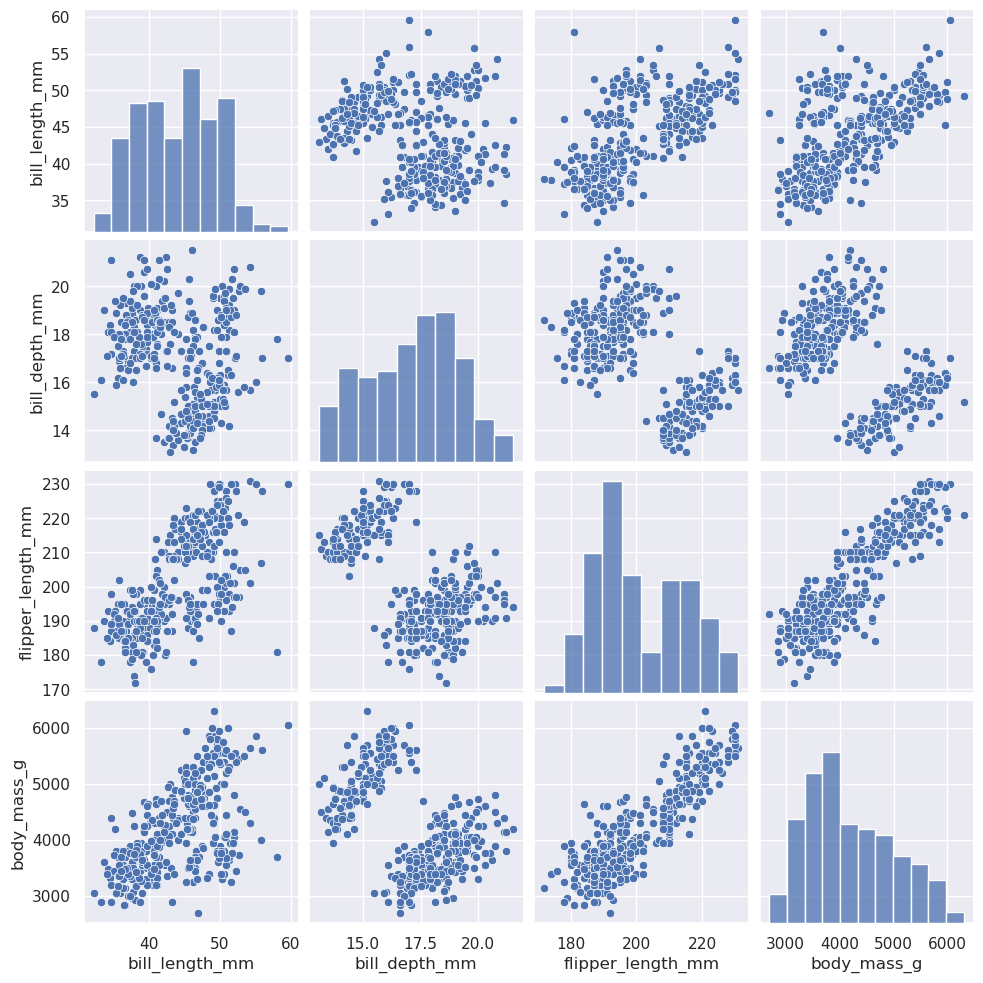

In [28]:
sns.pairplot(penguins)

- If `hue` is defined then the diagonal plots will be KDE plots (to show Histograms instead, define the `diag_kind` argument explicitly to *"hist"*).

- To show a subset of variables use the `vars` argument. Or, to plot different variables on the rows and columns use `x_vars` and `y_vars` arguments (this will result in non-square plots).

- The `markers` parameter applies a style mapping on the off-diagonal axes.

- Set `corner=True` to draw plots only on the lower triangular region.

- The `plot_kws` and `diag_kws` parameters accept dicts of keyword arguments to customize the off-diagonal and diagonal plots, respectively.